# Naive bayes

In [34]:
data <- read.csv("../../data/processed/old_train_cleaned.csv")
head(data)

,X,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,0,1,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,26.82262,265,1,49.57495,80.41530,2,312.4941,0
2,1,2,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,31.94496,265,1,49.57495,118.28022,3,284.6292,0
3,2,3,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,28.60935,267,1,49.57495,81.69952,4,331.2099,0
4,3,4,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,31.37786,268,1,49.57495,199.45807,5,223.4513,0
5,4,5,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,24.79735,269,1,49.57495,41.42015,1,341.4892,0
6,5,6,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,27.26226,270,1,49.57495,62.43017,1,340.4792,0


In [35]:
library(e1071)
library(caTools)
library(caret)

In [36]:
data <- read.csv("../../data/processed/old_train_cleaned.csv")


X <- data[, !(names(data) %in% c("Credit_Score"))]
y <- as.factor(data$Credit_Score)  


set.seed(42) 
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_index, ]
y_train <- y[train_index]
X_test <- X[-train_index, ]
y_test <- y[-train_index]


In [37]:
# Fitting Naive Bayes Model 
# to training dataset
set.seed(120)  # Setting Seed
classifier_cl <- naiveBayes(y_train ~ ., data = data.frame(cbind(X_train, y_train)), usekernel = TRUE)
classifier_cl


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace, usekernel = TRUE)

A-priori probabilities:
Y
        0         1         2 
0.1782830 0.2899803 0.5317367 

Conditional probabilities:
   X
Y       [,1]     [,2]
  0 50179.42 28994.78
  1 49614.25 28752.07
  2 50141.79 28859.96

   Month
Y       [,1]     [,2]
  0 4.673351 2.270502
  1 4.514419 2.284650
  2 4.433921 2.299131

   Age
Y       [,1]     [,2]
  0 36.42368 11.07699
  1 31.24303 10.01445
  2 33.41236 10.78363

   Occupation
Y       [,1]     [,2]
  0 6.857323 4.256209
  1 6.979956 4.348432
  2 6.962435 4.314659

   Annual_Income
Y       [,1]     [,2]
  0 64936.26 44464.71
  1 40635.33 31955.87
  2 51060.51 37523.60

   Monthly_Inhand_Salary
Y       [,1]     [,2]
  0 5380.796 3698.874
  1 3384.801 2666.138
  2 4246.746 3124.856

   Num_Bank_Accounts
Y       [,1]     [,2]
  0 3.444437 2.222444
  1 6.533342 2.503467
  2 5.389140 2.359038

   Num_Credit_Card
Y       [,1]     [

In [38]:
predictions <- predict(classifier_cl, newdata = X_test)
 

In [39]:
#C matrix
confusion_matrix <- confusionMatrix(predictions, y_test)
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2
         0 2964  997 2590
         1   72 3945 2197
         2  529  857 5847

Overall Statistics
                                          
               Accuracy : 0.6379          
                 95% CI : (0.6312, 0.6445)
    No Information Rate : 0.5318          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4506          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity            0.8314   0.6803   0.5498
Specificity            0.7817   0.8402   0.8520
Pos Pred Value         0.4525   0.6349   0.8084
Neg Pred Value         0.9553   0.8655   0.6250
Prevalence             0.1783   0.2900   0.5318
Detection Rate         0.1482   0.1973   0.2924
Detection Prevalence   0.3276   0.3107   0.3617
Balanced Accuracy      0.8066

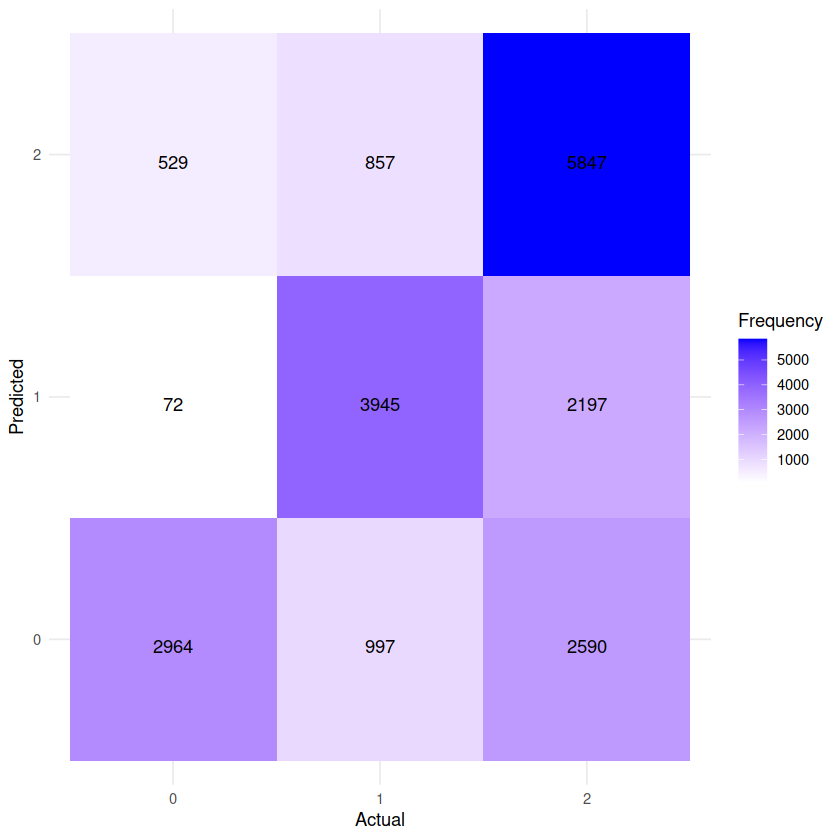

In [40]:
# Visualize the confusion matrix
plot_confusion <- ggplot(as.data.frame(confusion_matrix$table), aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "blue") +
  labs(x = "Actual", y = "Predicted", fill = "Frequency") +
  theme_minimal()

# Print the plot
print(plot_confusion)

In [41]:
cm <- table(y_test, predictions)
cm

      predictions
y_test    0    1    2
     0 2964   72  529
     1  997 3945  857
     2 2590 2197 5847

In [42]:
confusionMatrix(cm)

Confusion Matrix and Statistics

      predictions
y_test    0    1    2
     0 2964   72  529
     1  997 3945  857
     2 2590 2197 5847

Overall Statistics
                                          
               Accuracy : 0.6379          
                 95% CI : (0.6312, 0.6445)
    No Information Rate : 0.3617          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4506          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity            0.4525   0.6349   0.8084
Specificity            0.9553   0.8655   0.6250
Pos Pred Value         0.8314   0.6803   0.5498
Neg Pred Value         0.7817   0.8402   0.8520
Prevalence             0.3276   0.3107   0.3617
Detection Rate         0.1482   0.1973   0.2924
Detection Prevalence   0.1783   0.2900   0.5318
Balanced Accuracy      0.7039   0.7502   0.7167